### Chapter 6. 탐색적 데이터 분석

#### 코드 6.1

In [ ]:
# 데이터 수집
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### 코드 6.2

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 코드 6.3

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### 코드 6.4 


In [ ]:
# train의 칼럼별 결측치 합계
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# test의 칼럼별 결측치 합계
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 코드 6.5

In [ ]:
train["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("mean"), inplace=True)

#### 코드 6.6

In [ ]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

#### 코드 6.7

In [ ]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

#### 코드 6.8

In [ ]:
for dataset in [train, test]:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

#### 코드 6.9

In [ ]:
print (train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean())
print(test[test["Fare"].isnull()]["Pclass"])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550
152    3
Name: Pclass, dtype: int64


#### 코드 6.10

In [ ]:
for dataset in [test]:
    dataset['Fare'] = dataset['Fare'].fillna(13.675550)

#### 코드 6.11

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### 코드 6.12

In [1]:
# Titanic Data Set 불러오기
# 출처: https://www.kaggle.com/c/titanic/data

import pandas as pd

data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 코드 6.13

In [2]:
# data에 어떤 값들이 존재하는지와 그 크기를 알아보자
print('Columns: ', end ='')
print(data.columns)
print('Data size: ', end = '')
print(data.shape)

Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Data size: (891, 12)


#### 코드 6.14

In [3]:
#사망자와 생존자의 비율을 Survived를 통해 알아보자
#Survived가 0이라는 것은 해당 승객이 사망했음을, 1이라는 것은 생존했음을 뜻한다.

data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived Ratio')

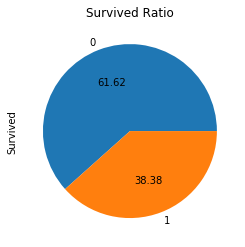

In [4]:
# 값을 확인했다면, 간단하게 시각화해보자.
ax = data['Survived'].value_counts().plot.pie(autopct ='%.2f')
ax.set_title('Survived Ratio')

#### 코드 6.15

<function matplotlib.pyplot.show(*args, **kw)>

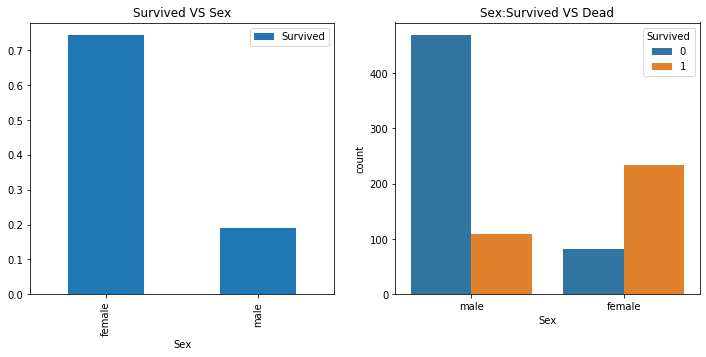

In [5]:
# 성별에 따른 생존률은 어떨까?
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(1,2,figsize=(12,5))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived VS Dead')
plt.show

#### 코드 6.16

In [6]:
# 다음으로 선실의 등급인 Pclass도 분석해보자
# 1은 1등실을, 2는 2등실을, 3은 3등실을 나타낸다.

data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
# 선실 등급 별 생존자 수도 알아보자
pd.crosstab(data.Pclass, data.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


#### 코드 6.17

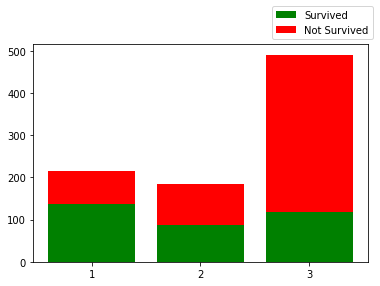

In [8]:
import numpy as np
import matplotlib.pyplot as plt

survived = [136, 87, 119]
not_survived = [80, 97, 372]

Pclass = ["1","2","3"]

plt.bar(Pclass, survived, color="green", label="Survived")
plt.bar(Pclass, not_survived, color="red", 
        bottom=np.array(survived), label="Not Survived")

plt.legend(loc="lower left", bbox_to_anchor=(0.7,1.0))
plt.show()

#### 코드 6.18

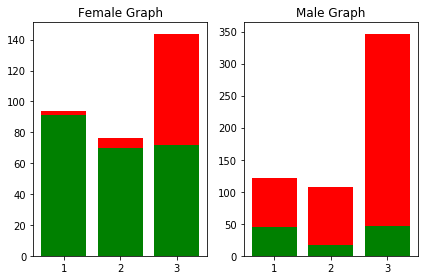

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Pclass = ["1","2","3"]
f_survived = [91, 70, 72]
f_not_survived = [3, 6, 72]

m_survived = [45, 17, 47]
m_not_survived = [77, 91, 300]

plt.subplot(1, 2, 1)                # nrows=1, ncols=2, index=1
plt.bar(Pclass, f_survived, color="green", label="Survived")
plt.bar(Pclass, f_not_survived, color="red", 
        bottom=np.array(f_survived), label="Not Survived")
plt.title('Female Graph')

plt.subplot(1, 2, 2)                # nrows=1, ncols=2, index=2
plt.bar(Pclass, m_survived, color="green", label="Survived")
plt.bar(Pclass, m_not_survived, color="red", 
        bottom=np.array(m_survived), label="Not Survived")
plt.title('Male Graph')

plt.tight_layout()
plt.show()

#### 코드 6.19

In [11]:
# 다음으로 각 column의 통계량을 확인해보자
# describe 함수는 수치형 데이터에 대한 요약만을 제공하므로, 
# Name과 같은 column은 빠져있는 것을 확인할 수 있다.

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 코드 6.19

In [12]:
# 이번에는 각 Column 간 상관계수를 확인해보자
data.corr()

# Pclass-Survived, 그리고 Fare-Pclass 간 큰 상관계수가 나옴

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
